In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [119]:
import os
import pandas as pd
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# RAVDESS

In [120]:
ravdess_path = "/home/hgidea/Desktop/Coding/Python/internship/null/real_internship/emotion_detection/speech_emotion_detection/sound1/audio_speech_actors_01-24/"
ravdess_files = [f for f in os.listdir(ravdess_path) if f.endswith('.wav')]

In [121]:
# Display the first few filenames
print(ravdess_files[:5])

[]


In [122]:
ravdess_directory_list = os.listdir(ravdess_path)

In [123]:
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess_path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess_path + dir + '/' + file)

In [124]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [125]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

In [126]:
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,disgust,/home/hgidea/Desktop/Coding/Python/internship/...
1,surprise,/home/hgidea/Desktop/Coding/Python/internship/...
2,angry,/home/hgidea/Desktop/Coding/Python/internship/...
3,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
4,fear,/home/hgidea/Desktop/Coding/Python/internship/...


In [127]:
# Display the first few filenames
print(Ravdess_df[:8])

   Emotions                                               Path
0   disgust  /home/hgidea/Desktop/Coding/Python/internship/...
1  surprise  /home/hgidea/Desktop/Coding/Python/internship/...
2     angry  /home/hgidea/Desktop/Coding/Python/internship/...
3   neutral  /home/hgidea/Desktop/Coding/Python/internship/...
4      fear  /home/hgidea/Desktop/Coding/Python/internship/...
5      fear  /home/hgidea/Desktop/Coding/Python/internship/...
6  surprise  /home/hgidea/Desktop/Coding/Python/internship/...
7     happy  /home/hgidea/Desktop/Coding/Python/internship/...


# Crema DataFrame

In [128]:
cremad_path = "/home/hgidea/Desktop/Coding/Python/internship/null/real_internship/emotion_detection/speech_emotion_detection/sound2/AudioWAV/"
cremad_files = [f for f in os.listdir(cremad_path) if f.endswith('.wav')]
print(cremad_files[:5])


['1055_IEO_NEU_XX.wav', '1046_IOM_DIS_XX.wav', '1086_DFA_NEU_XX.wav', '1044_IWL_HAP_XX.wav', '1083_IEO_DIS_MD.wav']


In [129]:
crema_directory_list = os.listdir(cremad_path)

file_emotion = []
file_path = []

In [130]:
for file in crema_directory_list:
    # storing file paths
    file_path.append(cremad_path + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

In [131]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [132]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
1,disgust,/home/hgidea/Desktop/Coding/Python/internship/...
2,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
3,happy,/home/hgidea/Desktop/Coding/Python/internship/...
4,disgust,/home/hgidea/Desktop/Coding/Python/internship/...


# TESS

In [133]:
tess_path = "/home/hgidea/Desktop/Coding/Python/internship/null/real_internship/emotion_detection/speech_emotion_detection/sound3/TESS Toronto emotional speech set data/"

tess_directory_list = os.listdir(tess_path)

file_emotion = []
file_path = []

In [134]:
tess_files = [f for f in os.listdir(tess_path) if f.endswith('.wav')]
print(tess_files[:5])

[]


In [135]:
for dir in tess_directory_list:
    directories = os.listdir(tess_path + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess_path + dir + '/' + file)

In [136]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [137]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
1,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
2,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
3,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
4,neutral,/home/hgidea/Desktop/Coding/Python/internship/...


# SAVEE

In [138]:
savee_path = "/home/hgidea/Desktop/Coding/Python/internship/null/real_internship/emotion_detection/speech_emotion_detection/sound4/ALL/"
savee_files = [f for f in os.listdir(savee_path) if f.endswith('.wav')]
print(savee_files[:5])


['KL_h12.wav', 'KL_a15.wav', 'JK_f05.wav', 'DC_h14.wav', 'JK_n13.wav']


In [139]:
savee_directory_list = os.listdir(savee_path)

file_emotion = []
file_path = []

In [140]:
for file in savee_directory_list:
    file_path.append(savee_path + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

In [141]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [142]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/home/hgidea/Desktop/Coding/Python/internship/...
1,angry,/home/hgidea/Desktop/Coding/Python/internship/...
2,fear,/home/hgidea/Desktop/Coding/Python/internship/...
3,happy,/home/hgidea/Desktop/Coding/Python/internship/...
4,neutral,/home/hgidea/Desktop/Coding/Python/internship/...


In [143]:
import tensorflow as tf

# Create a TensorFlow constant
const = tf.constant([[2.0, 3.0], [4.0, 5.0]])

# Run a simple operation
result = tf.square(const)

print(result)

tf.Tensor(
[[ 4.  9.]
 [16. 25.]], shape=(2, 2), dtype=float32)


In [144]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [145]:
# to play the audio files
from IPython.display import Audio

import keras

In [146]:
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential

In [147]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical

In [148]:
from keras.callbacks import ModelCheckpoint

# kaggle

In [149]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,disgust,/home/hgidea/Desktop/Coding/Python/internship/...
1,surprise,/home/hgidea/Desktop/Coding/Python/internship/...
2,angry,/home/hgidea/Desktop/Coding/Python/internship/...
3,neutral,/home/hgidea/Desktop/Coding/Python/internship/...
4,fear,/home/hgidea/Desktop/Coding/Python/internship/...


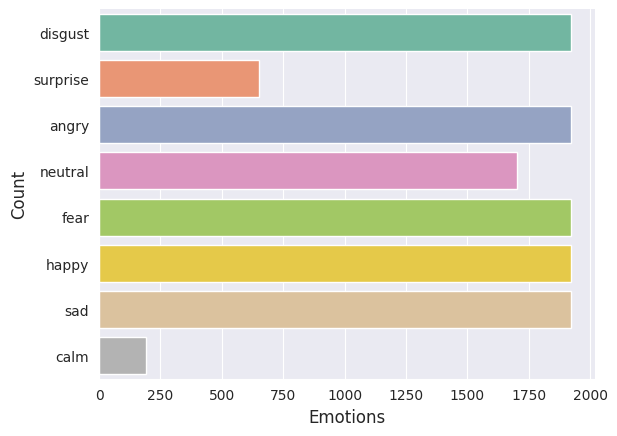

In [150]:
sns.countplot(data_path.Emotions, palette="Set2")
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [151]:
def create_waveplot(data, sr, e):
  plt.figure(figsize=(10, 3))
  plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

In [152]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

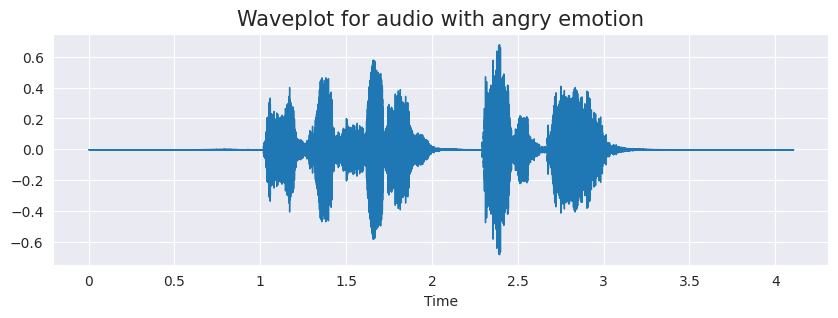

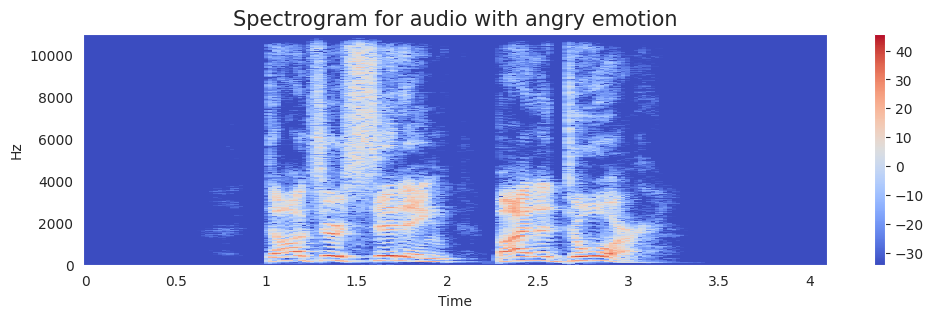

In [153]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

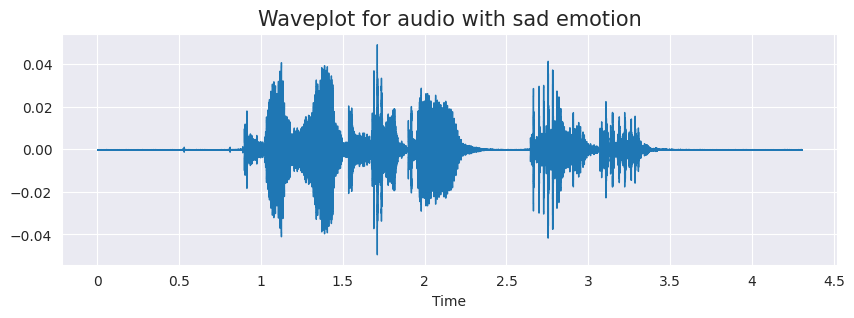

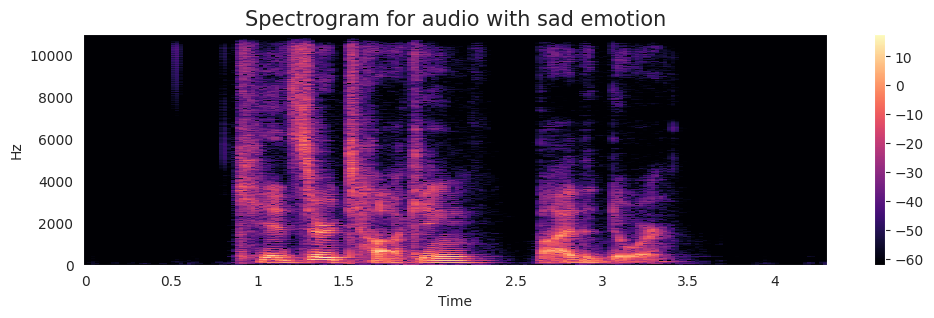

In [154]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

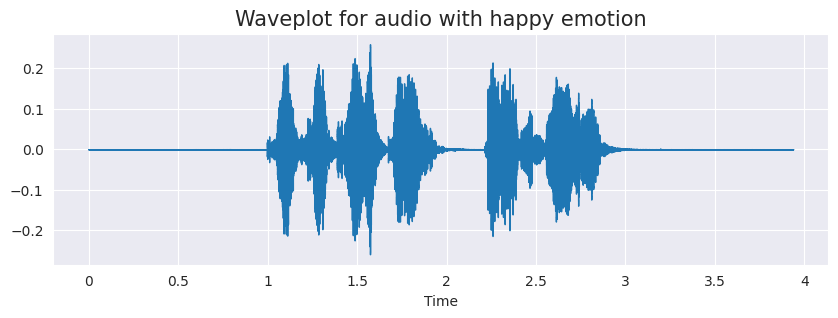

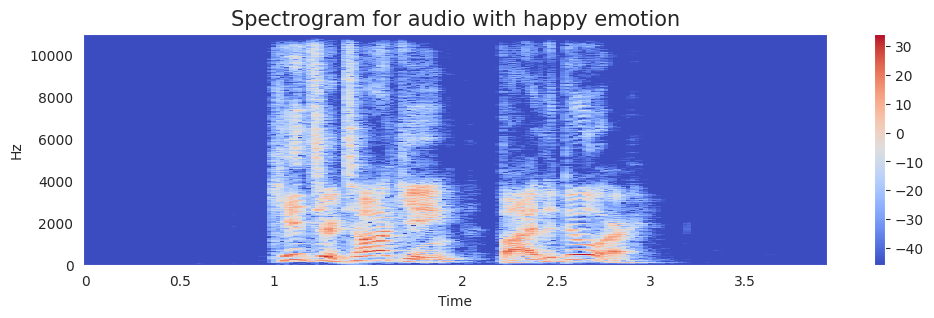

In [155]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [156]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [157]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

In [158]:
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

In [159]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [160]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

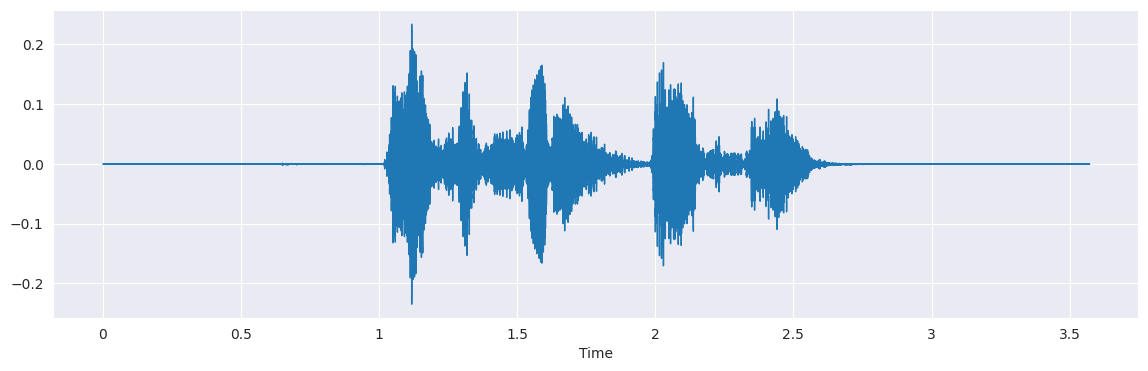

In [161]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

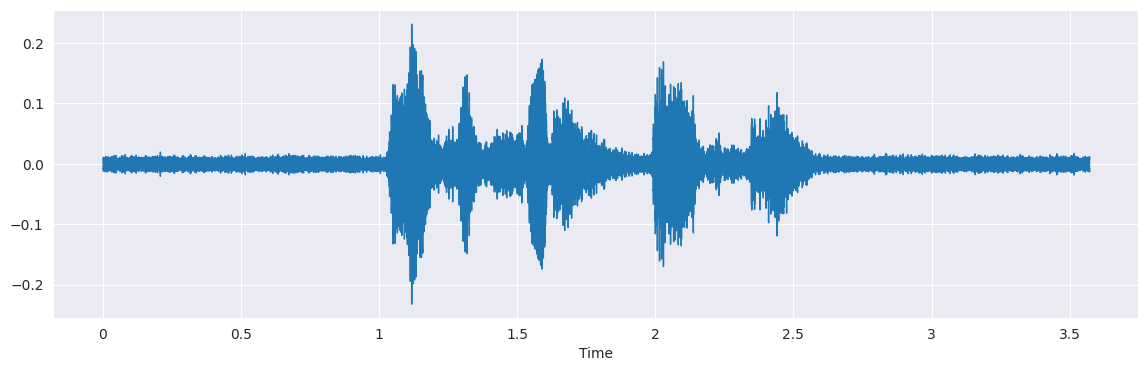

In [162]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

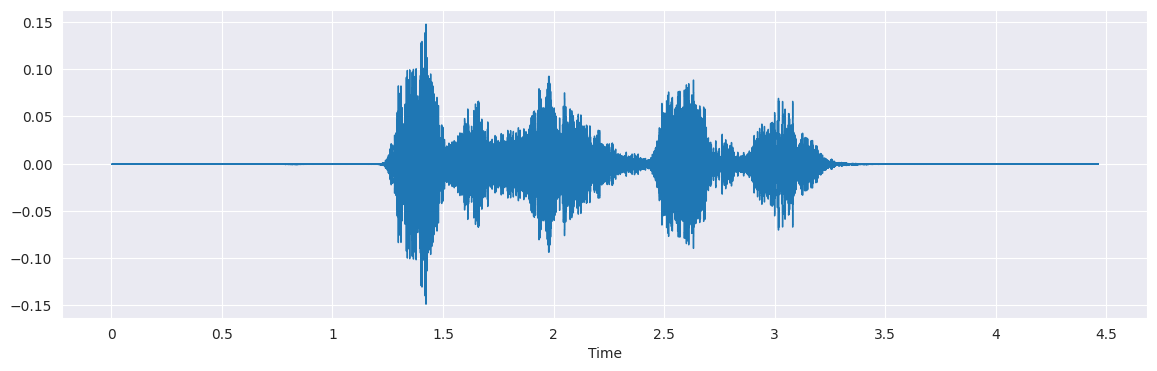

In [163]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

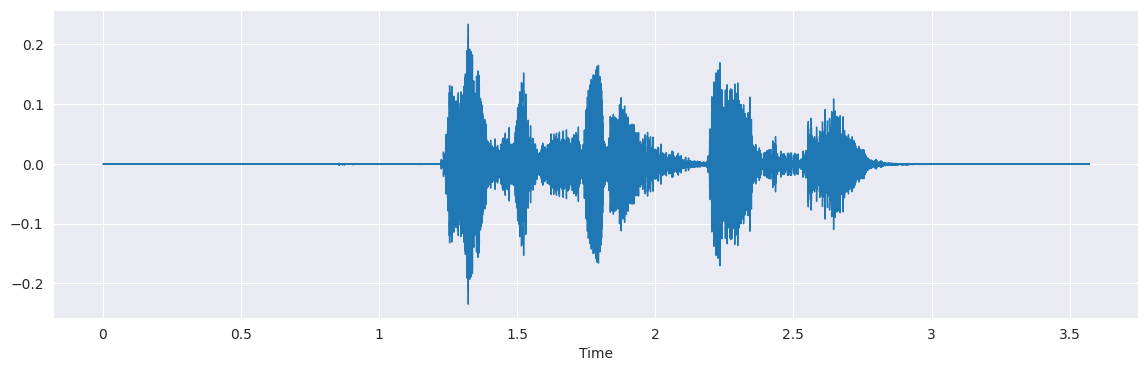

In [164]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

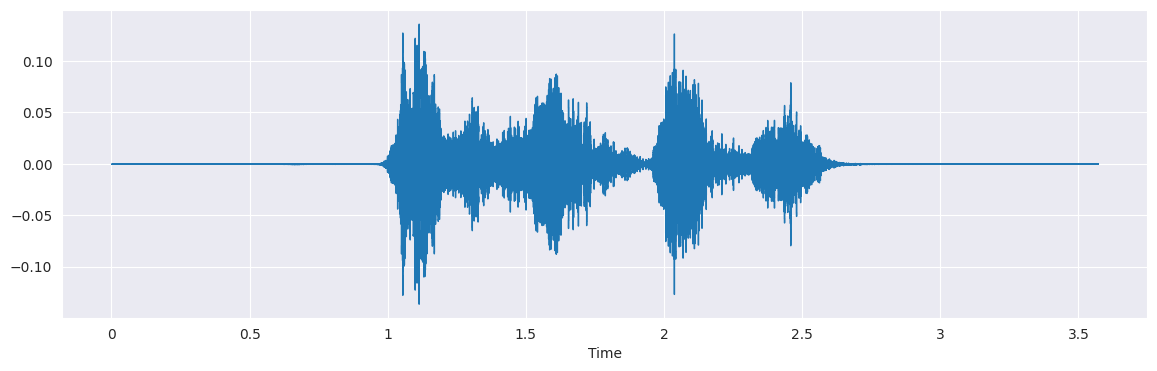

In [165]:
pitch_factor = 0.7
x = pitch(data, sampling_rate, pitch_factor)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
Audio(x, rate=sample_rate)

# Feature Extraction¶

In [166]:
def extract_features(data, sample_rate):
    result = np.array([])

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # Chroma STFT
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

In [167]:
def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Original audio features
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    # Data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))
    
    # Data with stretching and pitching
    stretched_data = stretch(data)
    data_stretch_pitch = pitch(stretched_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))
    
    return result

In [173]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [174]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    if os.path.exists(path):
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
    else:
        print(f"File not found: {path}")


In [175]:
print(len(X), len(Y), data_path.Path.shape)

36486 36486 (12162,)


In [176]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    if os.path.exists(path):
        features = get_features(path)
        for feature in features:
            X.append(feature)
            Y.append(emotion)
 

In [177]:
print(len(X), len(Y), data_path.Path.shape)

36486 36486 (12162,)


In [178]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.193694,0.576688,0.605808,0.598171,0.613483,0.706190,0.780585,0.769822,0.749665,0.727144,...,0.000283,0.000283,0.000286,0.000262,0.000177,0.000160,0.000230,0.000133,0.000015,disgust
1,0.335815,0.794728,0.805137,0.795039,0.836548,0.867924,0.798304,0.770807,0.804062,0.771840,...,0.003262,0.003231,0.003183,0.003161,0.003078,0.003212,0.003221,0.002953,0.002886,disgust
2,0.152072,0.574090,0.582036,0.587096,0.579043,0.626271,0.712214,0.767837,0.737906,0.754437,...,0.000076,0.000066,0.000060,0.000059,0.000069,0.000046,0.000038,0.000023,0.000003,disgust
3,0.209554,0.592089,0.621022,0.583317,0.584394,0.589110,0.641358,0.691503,0.759873,0.757173,...,0.000943,0.000690,0.000594,0.000511,0.000584,0.000801,0.000921,0.000568,0.000050,surprise
4,0.319200,0.754772,0.766138,0.794366,0.782279,0.781229,0.770842,0.733286,0.765775,0.782108,...,0.004656,0.004521,0.004338,0.004049,0.004305,0.004626,0.004661,0.004123,0.003650,surprise


# Data Preparation

In [179]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [180]:
# Load features and labels
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

In [181]:
# One-hot encode labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

In [187]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)


In [188]:
# Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [189]:
# Expand dimensions for compatibility with models
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [190]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(27364, 162, 1) (27364, 8) (9122, 162, 1) (9122, 8)


# Model Building

## 1. Convolutional Neural Network (CNN)


In [215]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam, SGD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
# Define the CNN model creation function
def create_cnn_model(optimizer):
    model = Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(input_shape)))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=8, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [217]:
# Define the parameter grid for CNN model
param_grid_cnn = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': [Adam(), RMSprop(), Adagrad(), Adadelta(), Adamax(), Nadam(), SGD()]
}

In [218]:
# Define input shape based on your data
input_shape = (x_train.shape[1], x_train.shape[2])

In [219]:
# Perform Grid Search for CNN model
print("Performing Grid Search for CNN Model...")
best_score_cnn = -1
best_params_cnn = None
best_model_cnn = None
for batch_size in param_grid_cnn['batch_size']:
    for epochs in param_grid_cnn['epochs']:
        for optimizer in param_grid_cnn['optimizer']:
            print(f"Training CNN model with Batch Size={batch_size}, Epochs={epochs}, Optimizer={optimizer.__class__.__name__}")
            
            # Create the CNN model
            model = create_cnn_model(optimizer)
            
            # Train the model
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
            
            # Evaluate the model
            _, accuracy = model.evaluate(x_test, y_test, verbose=0)
            print(f"Validation Accuracy: {accuracy}")
            
            # Check if this is the best model
            if accuracy > best_score_cnn:
                best_score_cnn = accuracy
                best_params_cnn = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer.__class__.__name__}
                best_model_cnn = model

Performing Grid Search for CNN Model...
Training CNN model with Batch Size=16, Epochs=50, Optimizer=Adam
Validation Accuracy: 0.582547664642334
Training CNN model with Batch Size=16, Epochs=50, Optimizer=RMSprop


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x786ed452b050>>
Traceback (most recent call last):
  File "/home/hgidea/Desktop/Coding/Python/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# Print the best parameters and evaluate the best CNN model
print("Best CNN Parameters:", best_params_cnn)
Y_pred_cnn = best_model_cnn.predict(x_test)
print("Classification Report - CNN Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(Y_pred_cnn, axis=1)))


In [ ]:
# Plot Confusion Matrix for the best CNN model
cm_cnn = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_pred_cnn, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CNN Model')
plt.show()

## 2. Long Short-Term Memory (LSTM) Network

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam, SGD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the LSTM model creation function
def create_lstm_model(optimizer):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(input_shape)))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Define the parameter grid for LSTM model
param_grid_lstm = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': [Adam(), RMSprop(), Adagrad(), Adadelta(), Adamax(), Nadam(), SGD()]
}


In [ ]:
# Define input shape based on your data
input_shape = (x_train.shape[1], x_train.shape[2])

In [ ]:
# Perform Grid Search for LSTM model
print("Performing Grid Search for LSTM Model...")
best_score_lstm = -1
best_params_lstm = None
best_model_lstm = None

for batch_size in param_grid_lstm['batch_size']:
    for epochs in param_grid_lstm['epochs']:
        for optimizer in param_grid_lstm['optimizer']:
            print(f"Training LSTM model with Batch Size={batch_size}, Epochs={epochs}, Optimizer={optimizer.__class__.__name__}")
            
            # Create the LSTM model
            model = create_lstm_model(optimizer)
            
            # Train the model
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
            
            # Evaluate the model
            _, accuracy = model.evaluate(x_test, y_test, verbose=0)
            print(f"Validation Accuracy: {accuracy}")
            
            # Check if this is the best model
            if accuracy > best_score_lstm:
                best_score_lstm = accuracy
                best_params_lstm = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer.__class__.__name__}
                best_model_lstm = model


In [ ]:
# Print the best parameters and evaluate the best LSTM model
print("Best LSTM Parameters:", best_params_lstm)
Y_pred_lstm = best_model_lstm.predict(x_test)
print("Classification Report - LSTM Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(Y_pred_lstm, axis=1)))


In [ ]:
# Plot Confusion Matrix for the best LSTM model
cm_lstm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_pred_lstm, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LSTM Model')
plt.show()

## 3. Hybrid CNN-LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout
from keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam, SGD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the hybrid CNN-LSTM model creation function
def create_hybrid_model(optimizer):
    model = Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(input_shape)))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
    model.add(LSTM(128, return_sequences=False))  # LSTM layer after CNN layers
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Define the parameter grid for hybrid CNN-LSTM model
param_grid_hybrid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': [Adam(), RMSprop(), Adagrad(), Adadelta(), Adamax(), Nadam(), SGD()]
}

In [ ]:
# Define input shape based on your data
input_shape = (x_train.shape[1], x_train.shape[2])


In [ ]:
# Perform Grid Search for hybrid CNN-LSTM model
print("Performing Grid Search for Hybrid CNN-LSTM Model...")
best_score_hybrid = -1
best_params_hybrid = None
best_model_hybrid = None

for batch_size in param_grid_hybrid['batch_size']:
    for epochs in param_grid_hybrid['epochs']:
        for optimizer in param_grid_hybrid['optimizer']:
            print(f"Training Hybrid CNN-LSTM model with Batch Size={batch_size}, Epochs={epochs}, Optimizer={optimizer.__class__.__name__}")
            
            # Create the hybrid CNN-LSTM model
            model = create_hybrid_model(optimizer)
            
            # Train the model
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
            
            # Evaluate the model
            _, accuracy = model.evaluate(x_test, y_test, verbose=0)
            print(f"Validation Accuracy: {accuracy}")
            
            # Check if this is the best model
            if accuracy > best_score_hybrid:
                best_score_hybrid = accuracy
                best_params_hybrid = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer.__class__.__name__}
                best_model_hybrid = model

In [ ]:
# Print the best parameters and evaluate the best hybrid CNN-LSTM model
print("Best Hybrid CNN-LSTM Parameters:", best_params_hybrid)
Y_pred_hybrid = best_model_hybrid.predict(x_test)
print("Classification Report - Hybrid CNN-LSTM Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(Y_pred_hybrid, axis=1)))


In [ ]:
# Plot Confusion Matrix for the best hybrid CNN-LSTM model
cm_hybrid = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_pred_hybrid, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Hybrid CNN-LSTM Model')
plt.show()

In [ ]:
# Define the parameter grids
param_grid_lstm = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': [Adam(), RMSprop()]
}

param_grid_cnn = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': [Adam(), RMSprop()]
}

In [ ]:
# Perform Grid Search for LSTM model
print("Performing Grid Search for LSTM Model...")
lstm_model = create_lstm_model(input_shape=(x_train.shape[1], x_train.shape[2]))
grid_search_lstm = GridSearchCV(estimator=lstm_model, param_grid=param_grid_lstm, cv=3, n_jobs=-1)
grid_result_lstm = grid_search_lstm.fit(x_train, y_train)


In [ ]:
# Print best parameters and evaluate best LSTM model
print("Best LSTM Parameters:", grid_result_lstm.best_params_)
best_lstm_model = grid_result_lstm.best_estimator_
Y_pred_lstm = best_lstm_model.predict(x_test)
print("Classification Report - LSTM Model:")
print(classification_report(np.argmax(y_test, axis=1), Y_pred_lstm))

In [ ]:
# Plot Confusion Matrix for LSTM model
cm_lstm = confusion_matrix(np.argmax(y_test, axis=1), Y_pred_lstm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LSTM Model')
plt.show()

In [ ]:
# Perform Grid Search for CNN model
print("Performing Grid Search for CNN Model...")
cnn_model = create_cnn_model(input_shape=(x_train.shape[1], x_train.shape[2]))
grid_search_cnn = GridSearchCV(estimator=cnn_model, param_grid=param_grid_cnn, cv=3, n_jobs=-1)
grid_result_cnn = grid_search_cnn.fit(x_train, y_train)

In [ ]:
# Print best parameters and evaluate best CNN model
print("Best CNN Parameters:", grid_result_cnn.best_params_)
best_cnn_model = grid_result_cnn.best_estimator_
Y_pred_cnn = best_cnn_model.predict(x_test)
print("Classification Report - CNN Model:")
print(classification_report(np.argmax(y_test, axis=1), Y_pred_cnn))

In [ ]:
# Plot Confusion Matrix for CNN model
cm_cnn = confusion_matrix(np.argmax(y_test, axis=1), Y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CNN Model')
plt.show()

# Model Training and Evaluation

## Training Function

In [ ]:
from keras.callbacks import ReduceLROnPlateau

def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=50, batch_size=64):
    rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[rlrp])
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
    
    # Plot training history
    epochs_range = range(epochs)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    ax[0].plot(epochs_range, train_loss, label='Training Loss')
    ax[0].plot(epochs_range, test_loss, label='Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    
    ax[1].plot(epochs_range, train_acc, label='Training Accuracy')
    ax[1].plot(epochs_range, test_acc, label='Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()
    
    # Confusion matrix and classification report
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print(classification_report(y_true_classes, y_pred_classes))


## Training and Evaluating All Models

In [ ]:
# CNN Model
cnn_model = create_cnn_model(input_shape=(x_train.shape[1], 1))
train_and_evaluate_model(cnn_model, x_train, y_train, x_test, y_test)

# LSTM Model
lstm_model = create_lstm_model(input_shape=(x_train.shape[1], 1))
train_and_evaluate_model(lstm_model, x_train, y_train, x_test, y_test)

# CNN-LSTM Hybrid Model
cnn_lstm_model = create_cnn_lstm_model(input_shape=(x_train.shape[1], 1))
train_and_evaluate_model(cnn_lstm_model, x_train, y_train, x_test, y_test)


In [1]:
import pickle

In [2]:
# Path to your saved model file
model_path = '/home/hgidea/Desktop/Coding/Python/internship/null/real_internship/emotion_detection/emotion_audio.pkl'

# Load the model
with open(model_path, 'rb') as f:
    model = pickle.load(f)

2024-07-05 22:56:34.082215: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-05 22:56:34.083358: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 22:56:34.088321: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 22:56:34.105814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 22:56:34.128547: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [3]:
# Load the model
with open(model_path, 'rb') as f:
    model = pickle.load(f)

In [8]:
import librosa

In [9]:
# Function to preprocess audio (adjust based on your preprocessing steps)
def preprocess_audio(audio_file):
    try:
        # Load audio file
        y, sr = librosa.load(audio_file, sr=None)  # sr=None loads the native sampling rate

        # Extract features (example: using librosa to extract MFCC)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Flatten MFCCs into a 1D vector
        features = mfccs.flatten()

        return features

    except Exception as e:
        print(f"Error encountered while parsing file: {audio_file}, Error: {e}")
        return None

In [10]:
# Assuming you have a list of audio files for testing
test_audio_files = ['/home/hgidea/Desktop/Coding/Python/internship/null/real_internship/emotion_detection/speech_emotion_detection/male/indianmale (8).wav']





In [11]:
# Preprocess your test data
X_test = []
for audio_file in test_audio_files:
    # Preprocess audio
    features = preprocess_audio(audio_file)
    if features is not None:
        X_test.append(features)

In [13]:
# Convert to numpy array
import numpy as np

In [14]:
# Convert to numpy array
X_test = np.array(X_test)

In [15]:
# Make predictions
predictions = model.predict(X_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_42" is incompatible with the layer: expected axis -1 of input shape to have value 4992, but received input with shape (1, 52608)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 1651), dtype=float32)
  • training=False
  • mask=None

In [1]:
import pickle

# Save the best model
with open('emotion_audio.pkl', 'wb') as file:
    pickle.dump(best_model_cnn, file)


NameError: name 'best_model_cnn' is not defined

In [5]:
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Y_pred_cnn shape: {Y_pred_cnn.shape}")


NameError: name 'x_test' is not defined

In [6]:
print("First 5 predictions: ", np.argmax(Y_pred_cnn, axis=1)[:5])
print("First 5 actual labels: ", np.argmax(y_test, axis=1)[:5])


NameError: name 'Y_pred_cnn' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the best model on the test set
Y_pred_cnn = best_model_cnn.predict(x_test)

# Print classification report
print("Classification Report - Best CNN Model with Adamax:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(Y_pred_cnn, axis=1)))

# Plot confusion matrix
cm_cnn = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_pred_cnn, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best CNN Model with Adamax')
plt.show()


NameError: name 'best_model_cnn' is not defined

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Load the saved model
import pickle

# Assuming 'best_model_cnn' is your trained model
# Path to your saved model file
model_path = '/home/hgidea/Desktop/Coding/Python/internship/null/real_internship/emotion_detection/emotion_audio.pkl'

# Load the model
with open(model_path, 'rb') as f:
    model = pickle.load(f)



EOFError: Ran out of input

In [8]:
# Load features and labels from CSV files
features_df = pd.read_csv('features.csv')
datapath_df = pd.read_csv('datapath.csv')

# Assuming the features are stored in a column named 'features'
# and labels are in 'label' column
x_test = features_df.values

# Assuming the labels are categorical and one-hot encoded
y_test = pd.get_dummies(datapath_df['label']).values


NameError: name 'pd' is not defined

In [ ]:
# Load features and labels from CSV files
features_df = pd.read_csv('features.csv')
datapath_df = pd.read_csv('datapath.csv')

# Print the first few rows to verify content
print("Features DataFrame:")
print(features_df.head())

print("\nDataPath DataFrame:")
print(datapath_df.head())

# Assuming the features are stored in a column named 'features'
# If features are in separate columns, adjust accordingly
x_test = features_df.values

# Assuming the labels are categorical and one-hot encoded
y_test = pd.get_dummies(datapath_df['label']).values

# Print shapes to verify correct loading
print("\nShapes:")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


In [9]:
# Predict the test set results
Y_pred = best_model.predict(x_test)

# Print classification report
print("Classification Report - Best Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(Y_pred, axis=1)))

# Plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best Model')
plt.show()


NameError: name 'best_model' is not defined

In [10]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved model
with open('emotion_audio.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Load features and labels from CSV files
features_df = pd.read_csv('features.csv')
datapath_df = pd.read_csv('datapath.csv')

# Assuming the features are stored in a column named 'features'
# and labels are in 'label' column
x_test = features_df.values

# Assuming the labels are categorical and one-hot encoded
y_test = pd.get_dummies(datapath_df['label']).values

# Predict the test set results
Y_pred = best_model.predict(x_test)

# Print classification report
print("Classification Report - Best Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(Y_pred, axis=1)))

# Plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best Model')
plt.show()


EOFError: Ran out of input